In [1]:
import emoji
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import missingno as ms
import string
from tqdm import tqdm
tqdm.pandas()
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import re

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(957, 3)


,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


100%|██████████| 957/957 [00:00<00:00, 15187.55it/s]


,S. No.,Message_body,Label
0,1,Rofl Its true to its name,0
1,2,The guy did some bitching but I acted like id ...,0
2,3,Pity was in mood for that Soany other suggest...,0
3,4,Will ü b going to esplanade fr home,0
4,5,This is the nd time we have tried contact u U...,1


100%|██████████| 957/957 [00:00<00:00, 36804.96it/s]


,S. No.,Message_body,Label
0,1,true name,0
1,2,guy itching acted like id interested buying so...,0
2,3,city mood suggestions,0
3,4,ü b going esplanade fr home,0
4,5,nd time tried contact u u £ round prize clai...,1


(125, 3)


,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


100%|██████████| 125/125 [00:00<00:00, 11344.54it/s]


,S. No.,Message_body,Label
0,1,UpgrdCentre Orange customer you may now claim ...,1
1,2,Loan for any purpose £ £ Homeowners Tenants ...,1
2,3,Congrats Nokia video camera phone is your Cal...,1
3,4,URGENT Your Mobile number has been awarded wit...,1
4,5,Someone has contacted our dating service and e...,1


100%|██████████| 125/125 [00:00<00:00, 24939.97it/s]


,S. No.,Message_body,Label
0,1,upgrdcentre range customer may claim free came...,1
1,2,moan purpose £ £ homeowners tenants welcome ...,1
2,3,congrats foka video camera phone walls cost ...,1
3,4,urgent mobile number awarded £ prize guarantee...,1
4,5,someone contracted dating service entered phon...,1


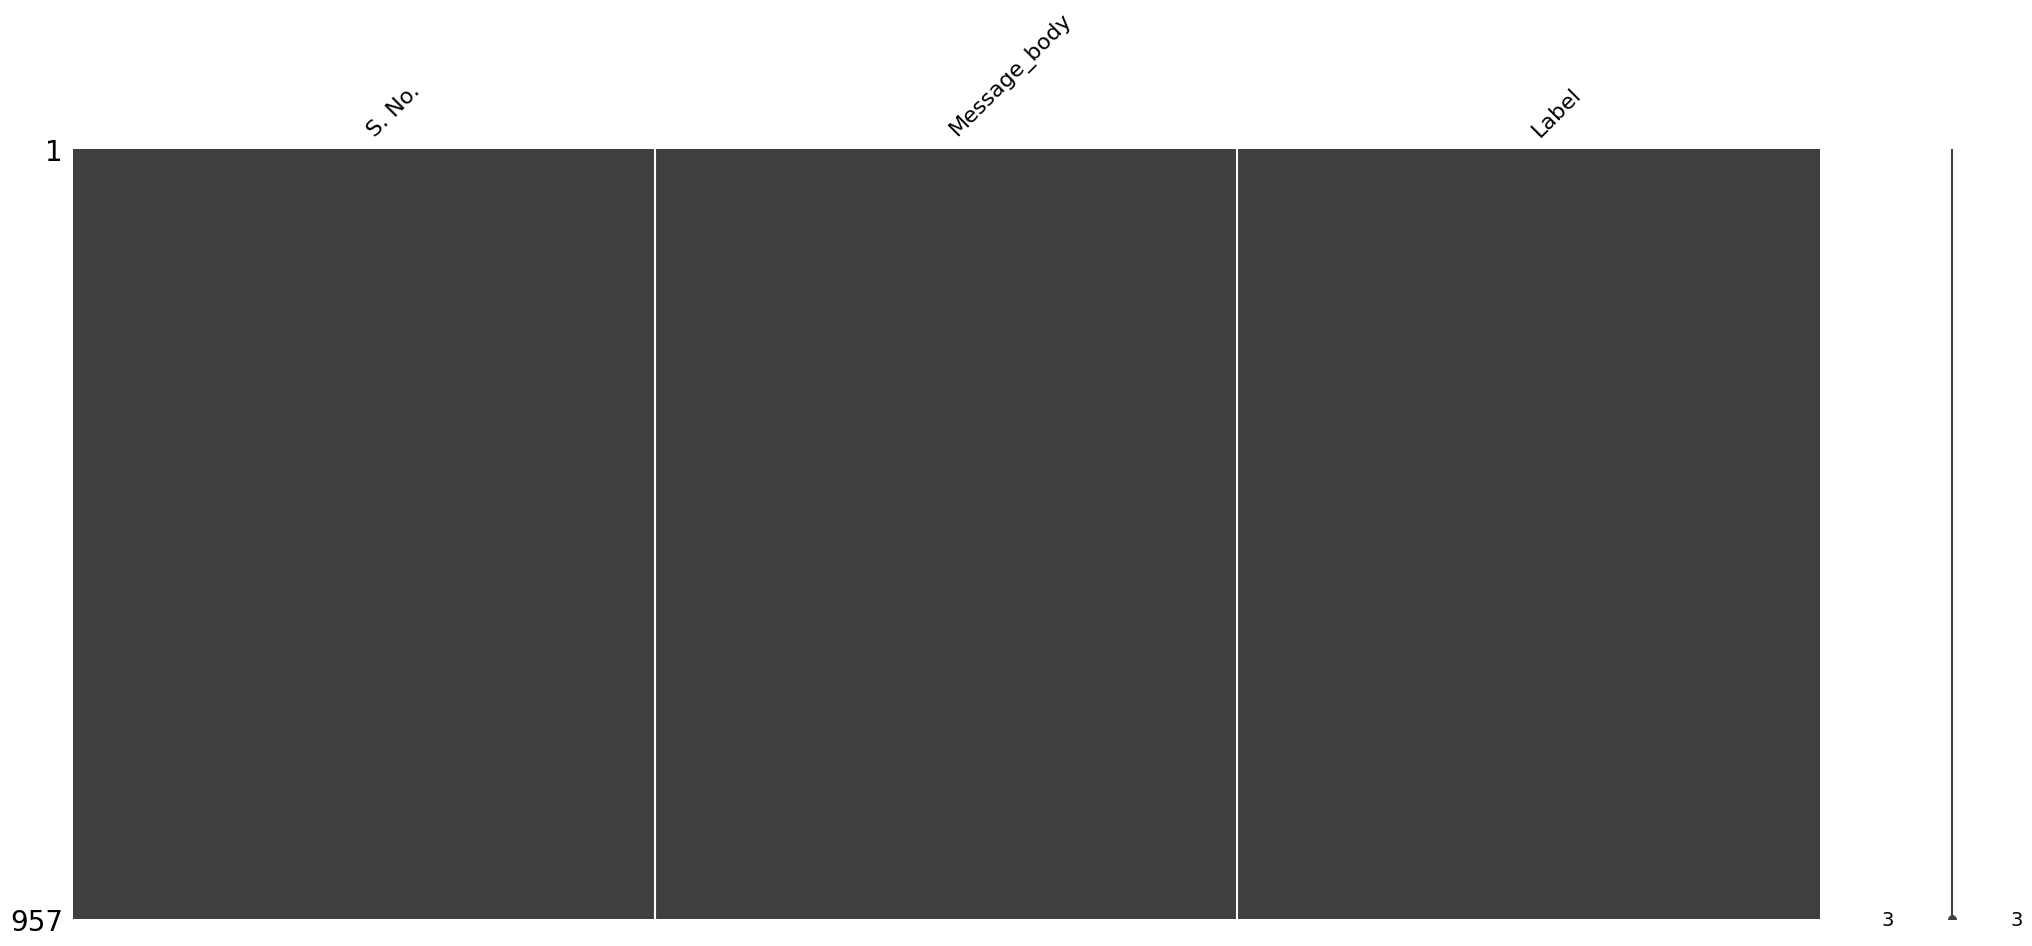

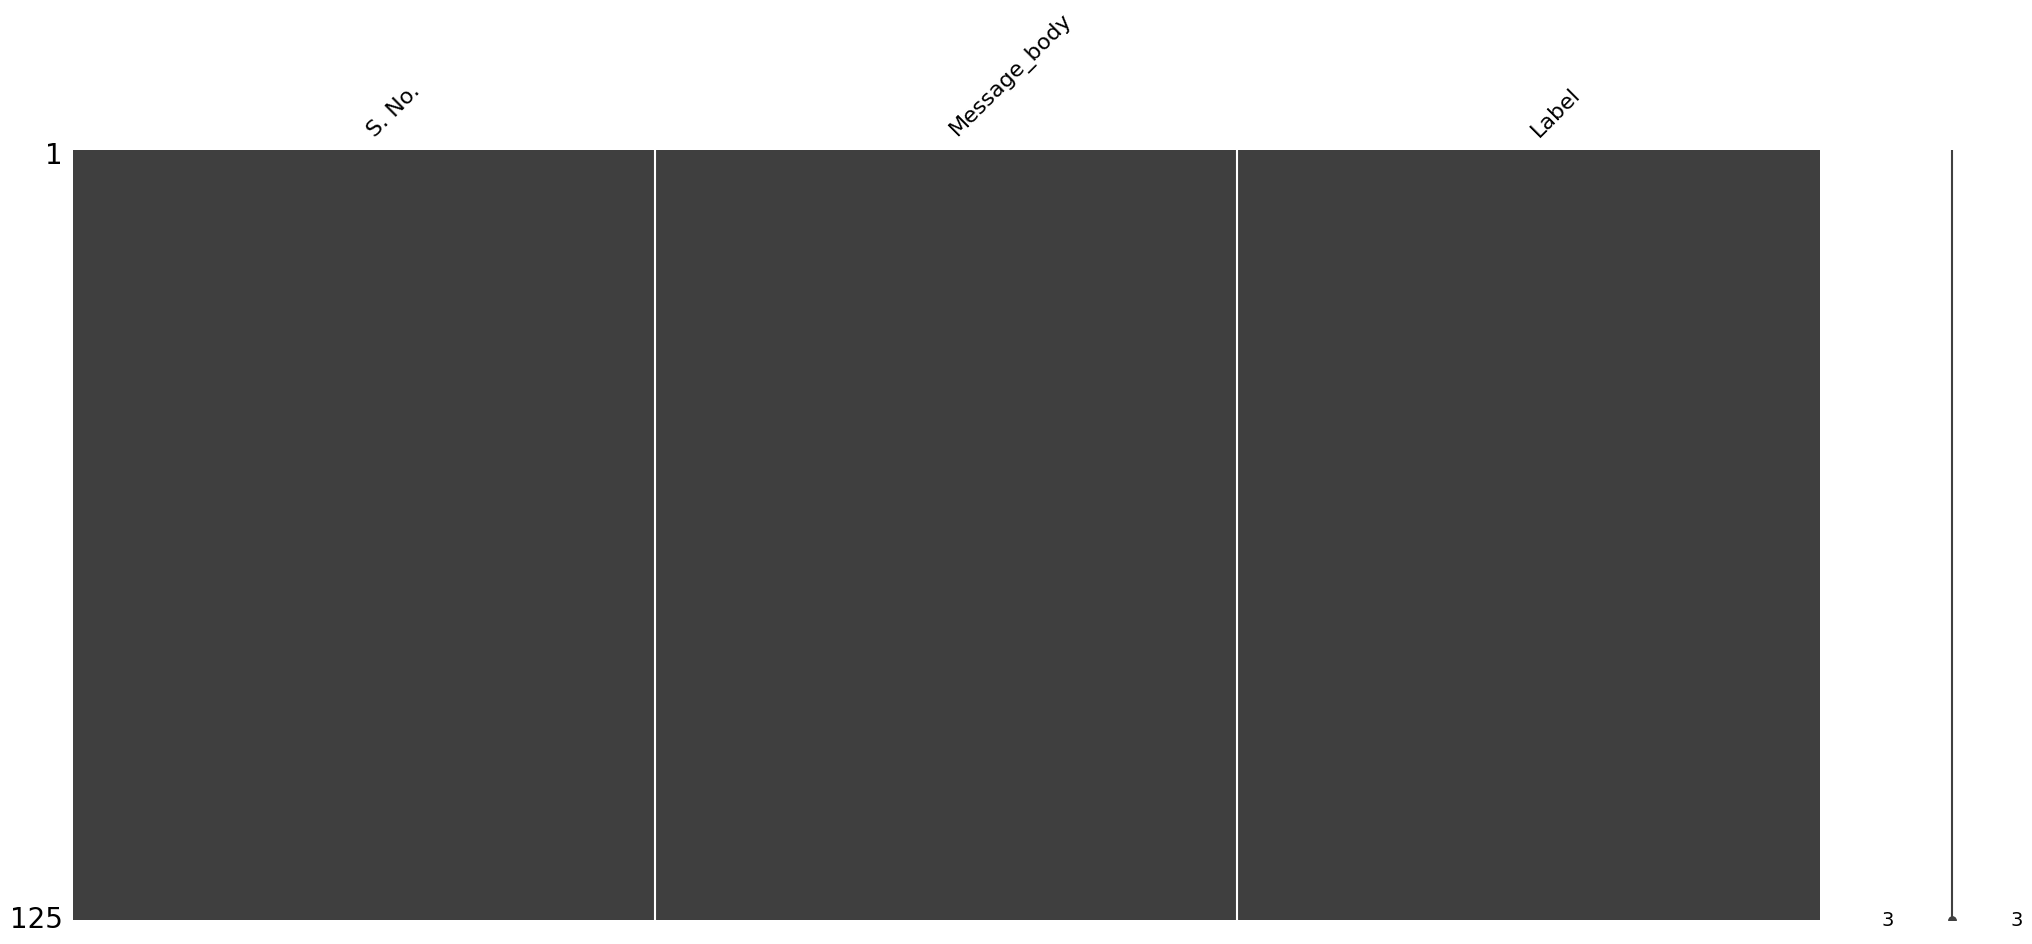

In [2]:


# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

dir = "./data_sets/"
os.makedirs(dir, exist_ok=True)  # Ensure the directory exists

train_file = "SMS_train.csv"
test_file = "SMS_test.csv"

try:
    data_train = pd.read_csv(dir + train_file, encoding='ISO-8859-1')
    print(data_train.shape)
    display(data_train.head())

    ms.matrix(data_train)

    data_train['Label'] = (data_train['Label'] == 'Spam').astype(int)

    def remove_html_urls_digits_emoji_punctuation(text):
        pattern1 = re.compile('<.*?>')
        text1 = pattern1.sub('', text)
        pattern2 = re.compile(r'https?://\S+|www\.\S+')
        text2 = pattern2.sub(r'', text1)
        for char in string.punctuation:
            text2 = text2.replace(char, '')
        return emoji.demojize(re.sub(r'\d+', '', text2))

    data_train['Message_body'] = data_train['Message_body'].progress_apply(
        remove_html_urls_digits_emoji_punctuation
    )

    display(data_train.head())

    data_train['Message_body'] = data_train['Message_body'].progress_apply(
        lambda txt: TextBlob(txt).correct().string.lower()
    )
    stopword = stopwords.words('english')

    data_train['Message_body'] = data_train['Message_body'].progress_apply(
        lambda txt: ' '.join(wrd for wrd in txt.split(' ') if wrd not in stopword)
    )

    display(data_train.head())

    data_test = pd.read_csv(dir + test_file, encoding='ISO-8859-1')
    print(data_test.shape)
    display(data_test.head())

    ms.matrix(data_test)

    data_test['Label'] = (data_test['Label'] == 'Spam').astype(int)

    def remove_html_urls_digits_emoji_punctuation(text):
        pattern1 = re.compile('<.*?>')
        text1 = pattern1.sub('', text)
        pattern2 = re.compile(r'https?://\S+|www\.\S+')
        text2 = pattern2.sub(r'', text1)
        for char in string.punctuation:
            text2 = text2.replace(char, '')
        return emoji.demojize(re.sub(r'\d+', '', text2))

    data_test['Message_body'] = data_test['Message_body'].progress_apply(
        remove_html_urls_digits_emoji_punctuation
    )

    display(data_test.head())

    data_test['Message_body'] = data_test['Message_body'].progress_apply(
        lambda txt: TextBlob(txt).correct().string.lower()
    )
    stopword = stopwords.words('english')

    data_test['Message_body'] = data_test['Message_body'].progress_apply(
        lambda txt: ' '.join(wrd for wrd in txt.split(' ') if wrd not in stopword)
    )

    display(data_test.head())

    # --- Extend the code for Federated Learning Simulation ---

    # 1. Feature Engineering (TF-IDF)
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(data_train['Message_body']).toarray()

    y_train = data_train['Label'].values

    X_test = vectorizer.transform(data_test['Message_body']).toarray()
    y_test = data_test['Label'].values

    # 2. Split data into training and a combined test/validation set
    # X_train, X_test, y_train, y_test = train_test_split(
    #     X, y, test_size=0.3, random_state=43, stratify=y
    # )

    # Convert to Pandas DataFrames for easier manipulation
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['Label'] = y_train

    test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
    test_df['Label'] = y_test

    # 3. Simulate Federated Learning Data Partitioning (4 clients)

except FileNotFoundError:
    print(f"Error: The file '{dir}{train_file}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [4]:
display(train_df['Label'])

0      0
1      0
2      0
3      0
4      1
      ..
952    0
953    0
954    0
955    0
956    0
Name: Label, Length: 957, dtype: int32

In [ ]:
train_df.sort_values(axis=0,by='Label',inplace=True)
train_df.reset_index(drop=True,inplace=True)
display(train_df)




,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2439,feature_2440,feature_2441,feature_2442,feature_2443,feature_2444,feature_2445,feature_2446,feature_2447,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.258745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [68]:
np.random.seed(782)
num_clients = 4
alpha = 1.6
min_samples_per_client = 10
min_samples_per_label = 5

labels = train_df['Label'].unique()
num_labels = len(labels)

client_data = dict()
client_indices = {-1:[]}

label_indices = {label: train_df.index[train_df['Label'] == label].tolist() for label in labels}
label_proportions = np.random.dirichlet([alpha] * num_labels, num_clients)
print(label_proportions)
total_samples = len(train_df)
done_samples = 0

# Assign data to each client based on the proportions and quantity skew
for client_id in range(num_clients):
    client_sample_indices = []
    num_samples_client = max(min_samples_per_client, int(len(train_df) / num_clients * np.random.uniform(0.5, 1.5))) # Introduce quantity skew
    print(num_samples_client)
    if(client_id == num_clients-1):
        num_samples_client = total_samples-done_samples
    done_samples+=num_samples_client
    for label_idx, label in enumerate(labels):
        num_samples_for_label = max(min_samples_per_label,int(label_proportions[client_id][label_idx] * len(label_indices[label])))
        remaining_indices = [idx for idx in label_indices[label] if idx not in np.concatenate(list(client_indices.values()))]
        samples_to_pick = min(num_samples_for_label, len(remaining_indices))
        selected_indices = np.random.choice(remaining_indices, samples_to_pick, replace=False)
        client_sample_indices.extend(selected_indices)
    
    while len(client_sample_indices) < num_samples_client:
        remaining_indices = [idx for indices in label_indices.values() for idx in indices if idx not in np.concatenate(list(client_indices.values())+[client_sample_indices])]
        if(client_id==num_clients-1):
            client_sample_indices.extend(remaining_indices)
            break
        num_needed = num_samples_client - len(client_sample_indices)
        additional_indices = np.random.choice(remaining_indices, min(num_needed, len(remaining_indices)), replace=False)
        client_sample_indices.extend(additional_indices)

    # Shuffle the assigned indices for the client
    np.random.shuffle(client_sample_indices)
    # Take a subset of the shuffled indices to introduce quantity skew
    client_sample_indices = client_sample_indices[:num_samples_client]

    # Assign the data to the client
    client_data[client_id] = train_df.loc[client_sample_indices].copy()
    client_indices[client_id] = client_sample_indices
del client_indices[-1]

display(client_indices)

[[0.39137464 0.60862536]
 [0.64415825 0.35584175]
 [0.20965604 0.79034396]
 [0.2694829  0.7305171 ]]
187
128
241
285


{0: [690,
  933,
  948,
  357,
  82,
  830,
  934,
  498,
  256,
  648,
  742,
  636,
  908,
  194,
  925,
  482,
  639,
  118,
  642,
  821,
  651,
  185,
  80,
  838,
  415,
  399,
  462,
  828,
  140,
  699,
  549,
  711,
  844,
  364,
  347,
  333,
  923,
  507,
  146,
  242,
  126,
  884,
  818,
  837,
  864,
  167,
  860,
  152,
  266,
  927,
  768,
  540,
  606,
  732,
  663,
  842,
  682,
  208,
  581,
  737,
  78,
  8,
  924,
  819,
  843,
  826,
  160,
  600,
  697,
  714,
  780,
  220,
  250,
  845,
  836,
  72,
  123,
  530,
  634,
  878,
  105,
  757,
  195,
  401,
  142,
  552,
  922,
  86,
  672,
  73,
  309,
  33,
  723,
  524,
  113,
  700,
  47,
  872,
  69,
  216,
  437,
  816,
  485,
  331,
  218,
  62,
  875,
  896,
  869,
  438,
  937,
  688,
  577,
  174,
  7,
  323,
  127,
  767,
  943,
  278,
  4,
  607,
  70,
  829,
  261,
  590,
  618,
  164,
  880,
  282,
  60,
  680,
  494,
  661,
  953,
  730,
  751,
  315,
  851,
  758,
  595,
  731,
  198,
  40,
  245,
 

In [69]:
display(sorted(np.unique(np.concatenate(list(client_indices.values())))))
len(sorted(np.unique(np.concatenate(list(client_indices.values())))))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


957

In [70]:

#Non-ID sim



# Save client datasets
client_dirs = [f"./data_sets/client_{i}" for i in range(num_clients)]
for i, client_df in client_data.items():
    os.makedirs(client_dirs[i], exist_ok=True)
    client_df.to_csv(f"{client_dirs[i]}/client_data.csv", index=False)
    print(f"Saved data for client {i+1} to {client_dirs[i]}/client_data.csv")

# Save the vectorizer for use in clients and server
import pickle
with open(f"{dir}/tfidf_vectorizer.pkl", 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the test/validation set for server-side evaluation
os.makedirs("./data_sets/server", exist_ok=True)
test_df.to_csv("./data_sets/server/test_data.csv", index=False)
print("Saved test/validation data to ./data_sets/server/test_data.csv")

Saved data for client 1 to ./data_sets/client_0/client_data.csv
Saved data for client 2 to ./data_sets/client_1/client_data.csv
Saved data for client 3 to ./data_sets/client_2/client_data.csv
Saved data for client 4 to ./data_sets/client_3/client_data.csv
Saved test/validation data to ./data_sets/server/test_data.csv


In [47]:
display(train_df.shape)

(957, 2449)

(957, 3)


,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


<Axes: >

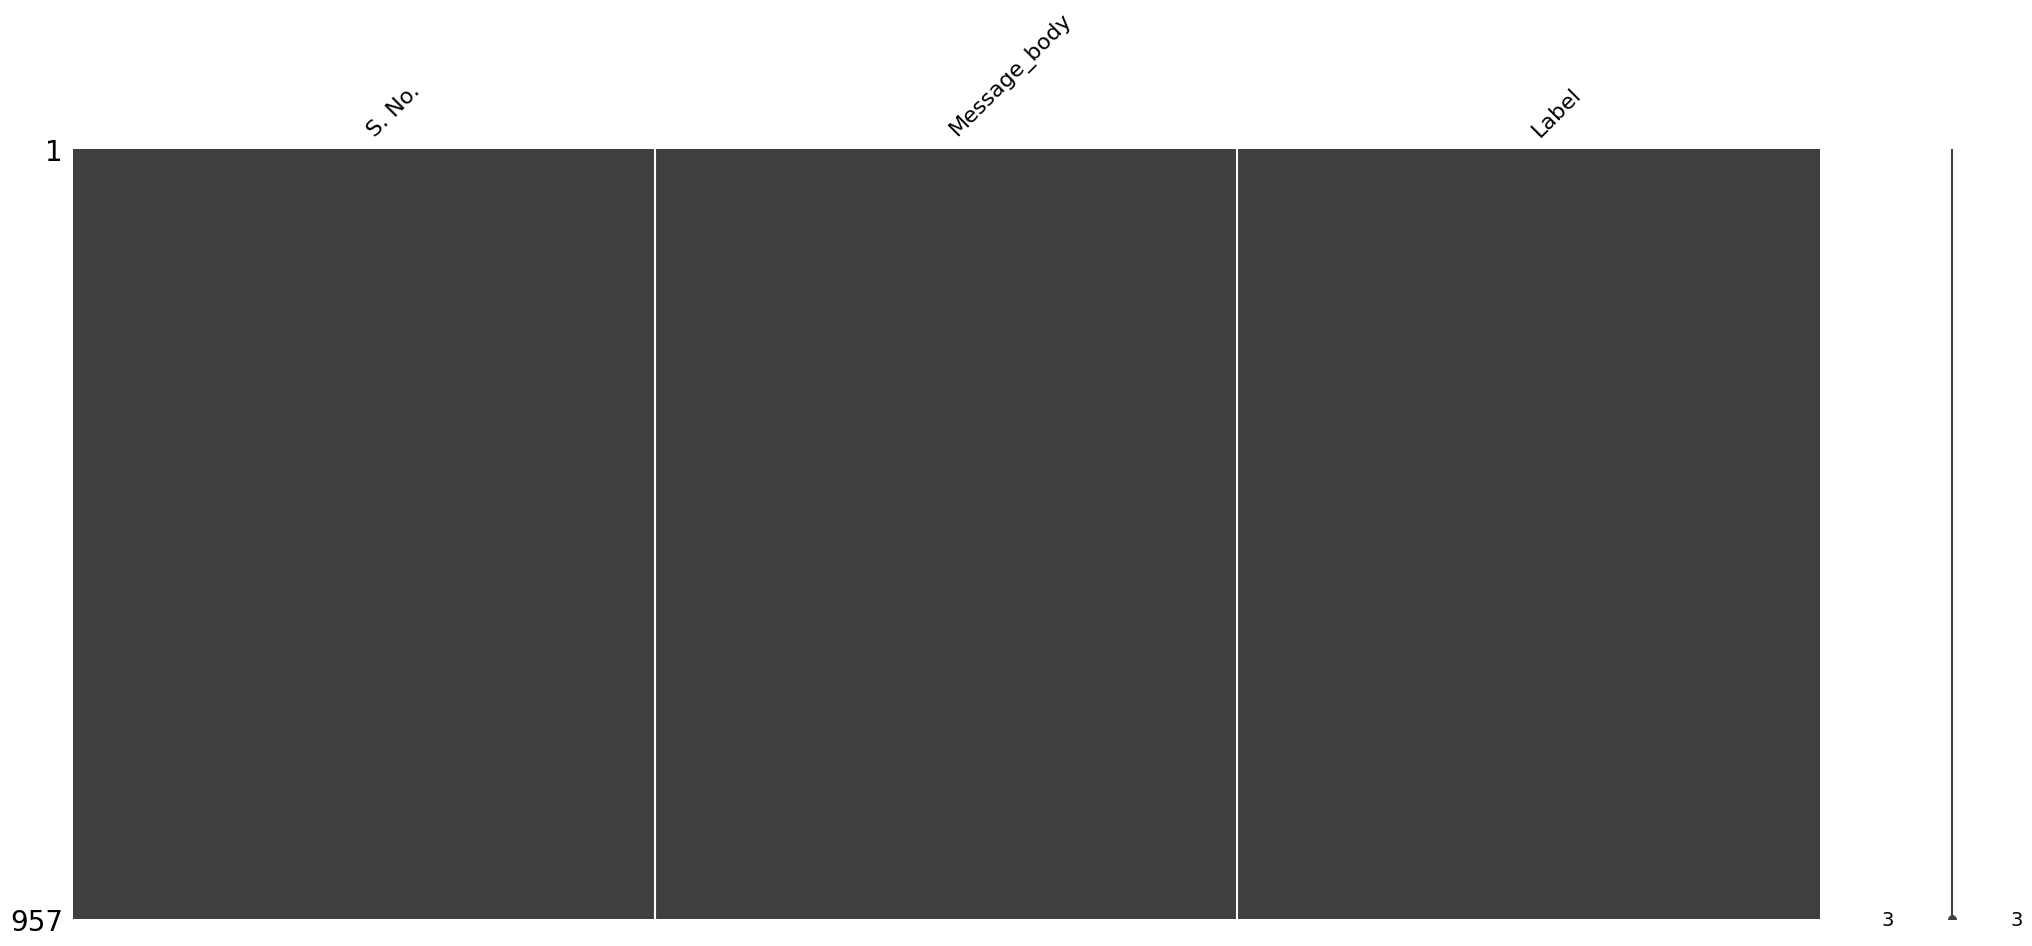

In [3]:
dir = "./data_sets/"
os.makedirs(dir, exist_ok=True)  # Ensure the directory exists

train_file = "SMS_train.csv"
test_file = "SMS_test.csv"


data = pd.read_csv(dir + train_file, encoding='ISO-8859-1')
print(data.shape)
display(data.head())

ms.matrix(data)

In [6]:
display(data['Label'].value_counts())

Label
Non-Spam    835
Spam        122
Name: count, dtype: int64